In [10]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/ppcu-data-mining-and-machine-learning-2022'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ppcu-data-mining-and-machine-learning-2022/X_test.csv
/kaggle/input/ppcu-data-mining-and-machine-learning-2022/y_train.csv
/kaggle/input/ppcu-data-mining-and-machine-learning-2022/X_train.csv
/kaggle/input/ppcu-data-mining-and-machine-learning-2022/y_test_pred_dectree_md2.csv


# Exploratory Data Analysis + Data Preprocessing
## Import Required Packages

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from imblearn.over_sampling import SMOTE
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import seaborn as sns
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform,randint
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from prettytable import PrettyTable
import pickle
from feature_engine.imputation import MeanMedianImputer
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings("ignore")

## Loading data into  

here, We have 3 datasets, the X_train.csv, X_test.csv and y_train.
y_train is the class attribute in our case.  Therefore for my simplisity I will merge the class attributes to the training dataset

In [12]:
Pre_Train = pd.read_csv("/kaggle/input/ppcu-data-mining-and-machine-learning-2022/X_train.csv", na_values=["na"])
Pre_Train.head()

,Id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,21470,0.0,2.130706e+09,168.0,0.0,0.0,0.0,0.0,0.0,...,187028.0,109090.0,228040.0,89664.0,296964.0,78936.0,58.0,0.0,0.0,0.0
1,1,40856,NaN,5.540000e+02,0.0,0.0,0.0,0.0,0.0,0.0,...,526386.0,277000.0,612436.0,441664.0,84968.0,2204.0,78.0,0.0,0.0,0.0
2,2,28,NaN,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,...,406.0,80.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,38682,NaN,3.440000e+02,326.0,0.0,0.0,0.0,0.0,0.0,...,244622.0,116794.0,267896.0,307242.0,248998.0,164098.0,300820.0,11238.0,0.0,0.0
4,4,62218,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,499450.0,242448.0,458620.0,422742.0,390678.0,287052.0,427584.0,10146.0,0.0,0.0


In [13]:
The_Classifier = pd.read_csv("/kaggle/input/ppcu-data-mining-and-machine-learning-2022/y_train.csv", na_values=["na"])
The_Classifier.head()

,Id,Expected
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [14]:
X_Train_merge = pd.merge(The_Classifier, Pre_Train, on = 'Id')
X_Train_merge.head()
print(X_Train_merge.shape)

(39900, 172)


In [45]:
X_mergeed = X_Train_merge.drop('Id', axis=1)
#X_mergeed = X_Train_merge

In [46]:
X_mergeed.head(5)
print(X_mergeed.shape)

(39900, 170)


In [47]:
#loading training dataet
x = X_mergeed
#x = X_Train_merge
print(x.shape)
x.head()

(39900, 170)


,Expected,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,21470,0.0,2.130706e+09,168.0,0.0,0.0,0.0,0.0,0.0,...,187028.0,109090.0,228040.0,89664.0,296964.0,78936.0,58.0,0.0,0.0,0.0
1,0,40856,NaN,5.540000e+02,0.0,0.0,0.0,0.0,0.0,0.0,...,526386.0,277000.0,612436.0,441664.0,84968.0,2204.0,78.0,0.0,0.0,0.0
2,0,28,NaN,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,...,406.0,80.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,38682,NaN,3.440000e+02,326.0,0.0,0.0,0.0,0.0,0.0,...,244622.0,116794.0,267896.0,307242.0,248998.0,164098.0,300820.0,11238.0,0.0,0.0
4,0,62218,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,499450.0,242448.0,458620.0,422742.0,390678.0,287052.0,427584.0,10146.0,0.0,0.0


In [48]:
print("Total number of Train datapoints: ",x.shape[0])
print("Total number of features: ",x.shape[1])

print("The column/feature names given are:\n ",list(x.columns))

Total number of Train datapoints:  39900
Total number of features:  170
The column/feature names given are:
  ['Expected', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000',

## Pre-Processing and Analysis

### Class Distribution

Here, we will look into the distribution of our dataset in graph. 

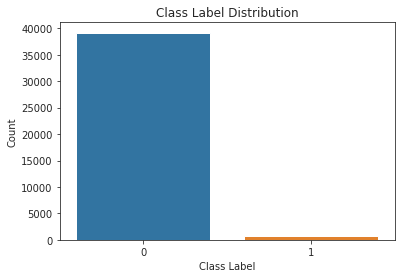

The number of One Expected points is:  722
The number of Zero Expected points is:  39178


In [49]:
# Plotting the distribution of Expected/class label
sns.barplot(x['Expected'].unique(), x['Expected'].value_counts())
# plot = sns.barplot(x= list(nan_count.keys())[:20],y = list(nan_count.values())[:20],palette="hls")

plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('The number of One Expected points is: ',x['Expected'].value_counts()[1])
print('The number of Zero Expected points is: ',x['Expected'].value_counts()[0])

**Observation:**

This dataset is **highly imbalanced** since there are far more "0" Expected points than "1" Expected points. To solve this issue, we may either try to upsample the minority Expected datapoints or use a modified classifier.

### Checking for single value features

Out of the available features, the ones that have the same value for all datapoints do not hold much importance in improving performance of our model. Hence, we can remove those features.

We can remove the features that have standard deviation = 0 

In [50]:
#function to remove the features that have standard deviation = 0
#This function returns a list of columns that have std. deviation of 0 
#meaning, all values are constant
def constant_value(df):
    constant_value_feature = []
    info = df.describe()
    for i in df.columns:
        if info[i]['std']==0:
            constant_value_feature.append(i)
    df.drop(constant_value_feature,axis=1,inplace=True)
    return df,constant_value_feature

x , dropped_feature = constant_value(x)
print("The features that are removed due to having a constant value (0 std. dev.) are: ",dropped_feature)
print("Shape of our feature set: ",x.shape)

The features that are removed due to having a constant value (0 std. dev.) are:  []
Shape of our feature set:  (39900, 170)


### Missing Values

what if our dataset have a high number of missing values. so lets check it

In [51]:
# Creating a dictionary whose keys are the column names and values are the percentage of missing values
nan_count = {k:list(x.isna().sum()*100/x.shape[0])[i] for i,k in enumerate(x.columns)}

# Sorting the dictionary in descending order based on the percentage of missing values
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}

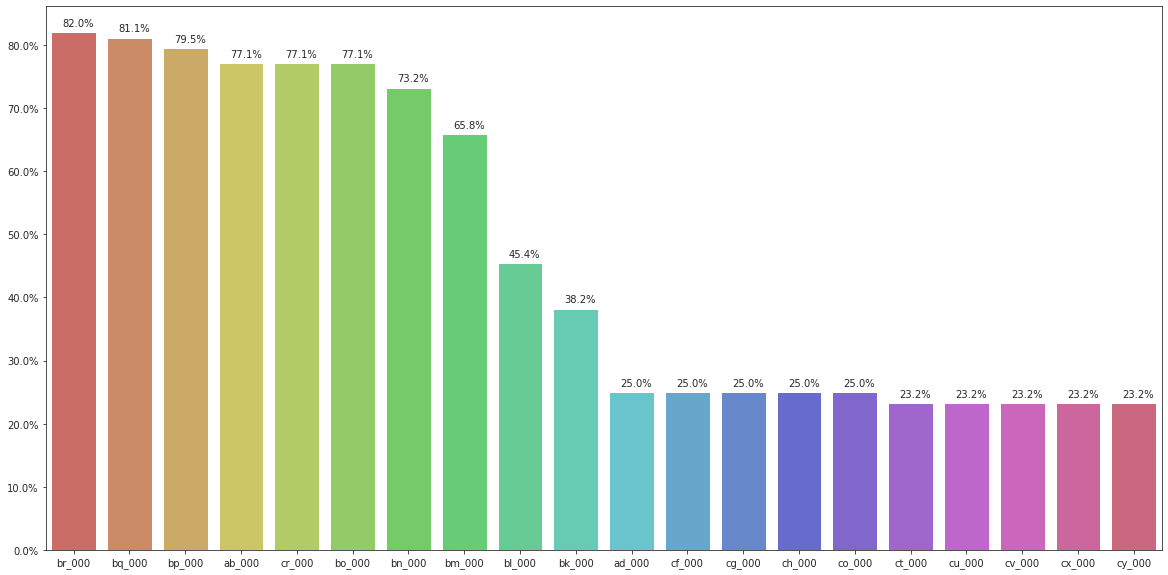

In [52]:
# Plotting a graph showing the top 20 features having highest percentage of missing values 
sns.set_style(style="ticks")
plt.figure(figsize=(20,10))

# Bar Plot
plot = sns.barplot(x= list(nan_count.keys())[:20],y = list(nan_count.values())[:20],palette="hls")

# put percentage value above each bar
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

**Observation:**

* It is very evident that 8 features have more than 50% missing values out of the total 39,900 datapoints.

## Part 2 Handling Missing Data
**Removing features and rows**

 This function removes features having more than 70% missing data, and removes rows that have NA values from features that have less than 5% missing data

In [53]:
def remove_na(df,nan_feat):
    
    # Removing features having more than 70% NA
    df = df.dropna(axis = 1, thresh=10000)

    # Removing rows having NA from above created list of features
    df = df.dropna(subset=nan_feat)

    # Reset Index values 
    df = df.reset_index(drop=True)
    return df

print("Earlier shape of x:",x.shape)

# List of features having less than 5% NA
na_5 = [k for k,v in nan_count.items() if v < 5]

x = remove_na(x,na_5)
print("Shape after removal of rows and columns:",x.shape)
print("Number of features having missing values below 5%:",len(na_5))

Earlier shape of x: (39900, 170)
Shape after removal of rows and columns: (37207, 164)
Number of features having missing values below 5%: 128


# Observation
From 39900 rows of data,  2693 rows has more than 70% missing data.

From 170 columns of feature, 8 columns has more than 70% missing data.

Number of features having missing values below 5%: 128.

## Feature Removal

As we can visualize from the above graph, we can see that 7 features are above 70% data point missing. 
creating a list of the top 7 features having highest number of missing values,
70% of it’s values missing. These features have been removed.

In [28]:
# creating a list of the top 7 features having highest number of missing values
na_70 = list(nan_count.keys())[:7]

# Total removed features
removed_features = na_70 + dropped_feature
print("Removed features are:", removed_features)

Removed features are: ['br_000', 'bq_000', 'bp_000', 'ab_000', 'cr_000', 'bo_000', 'bn_000', 'cd_000']


**Seperating Attributes and Class Label**

In [55]:
# Seperating the class/Expected label from the other attributes after the NAN rows/columns were deleted
y_train = x['Expected']
x_train = x.drop('Expected',axis=1)

check the spliting is whether coreect or not

In [32]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Expected, dtype: int64

In [27]:
x_train.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,21470,2.130706e+09,168.0,0.0,0.0,0.0,0.0,0.0,11968.0,723426.0,...,187028.0,109090.0,228040.0,89664.0,296964.0,78936.0,58.0,0.0,0.0,0.0
1,40856,5.540000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3310.0,...,526386.0,277000.0,612436.0,441664.0,84968.0,2204.0,78.0,0.0,0.0,0.0
2,28,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,...,406.0,80.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38682,3.440000e+02,326.0,0.0,0.0,0.0,0.0,0.0,0.0,418.0,...,244622.0,116794.0,267896.0,307242.0,248998.0,164098.0,300820.0,11238.0,0.0,0.0
4,62218,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,153220.0,...,499450.0,242448.0,458620.0,422742.0,390678.0,287052.0,427584.0,10146.0,0.0,0.0


**Imputation of Missing Values**: 
For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with **scikit-learn estimators** which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to **impute the missing values**, i.e., to infer them from the known part of the data.

**Model based Imputation / Multivariate Imputation by Chained Equations (MICE)**:

For features having 15% to 70% missing values, we will perform an Iterative model based imputation technique called MICE. At each step, a feature with missing values is designated as output y and the other feature columns are treated as inputs X. A regressor ( we have used Ridge Regressor ) is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter (10 as default) imputation rounds. The results of the final imputation round are returned.

In [56]:
# This function imputes Missing values using Median on given features, 
# and Model Based Imputation on the rest

def imputation(df,mis_col):
    
    # Using sklearn's SimpleImputer
    median_imputer = SimpleImputer(missing_values=np.NaN , strategy='median',copy=True)

    # Creating a new dataframe of imputed values
    median_df = median_imputer.fit_transform(df[mis_col])
    df1 = df.copy()
    df1[mis_col] = median_df

    # Performing Model-Based Imputation
    mice_imputer = IterativeImputer(estimator=Ridge(random_state=0),
                                    random_state=0)
    imputed_df = pd.DataFrame(data = mice_imputer.fit_transform(df1) , columns= df1.columns )

    return imputed_df , median_imputer , mice_imputer


# List of feature names that have missing values between 5% to 15%.
# We will impute the missing values in features with their median
median_imputed_features = [k for k,v in nan_count.items() if v >= 5 and v < 15]

imputed_x_train , MEDIAN_imputer , MICE_imputer = imputation( x_train , median_imputed_features )
print("Number of features whose missing values are imputed with median are:\n",len(median_imputed_features))

Number of features whose missing values are imputed with median are:
 14


## Reading and Preprocessing Test Dataset

Once we read our test dataset, we will pass it through a function 'preprocess_test_data()' that will perform the complete data preprocessing.

As I did in the above, here I'm going to merge test set and the classfier for my simplicity.

In [34]:
Pre_Test = pd.read_csv("/kaggle/input/ppcu-data-mining-and-machine-learning-2022/X_test.csv", na_values=["na"])
Pre_Test.head()

,Id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,240,2.0,4.200000e+01,26.0,0.0,0.0,0.0,0.0,0.0,...,1138.0,454.0,668.0,2104.0,770.0,4166.0,0.0,0.0,0.0,0.0
1,1,82082,NaN,2.320000e+02,230.0,0.0,0.0,0.0,0.0,0.0,...,767958.0,392298.0,751326.0,594178.0,437398.0,277398.0,474834.0,17866.0,0.0,0.0
2,2,39670,NaN,2.130706e+09,210.0,0.0,0.0,0.0,0.0,0.0,...,192224.0,124728.0,292870.0,437064.0,345024.0,204602.0,152228.0,3350.0,0.0,0.0
3,3,39398,2.0,6.400000e+01,NaN,0.0,0.0,0.0,0.0,0.0,...,463584.0,139068.0,245752.0,282366.0,396572.0,137862.0,4288.0,0.0,0.0,0.0
4,4,263566,NaN,NaN,NaN,NaN,NaN,0.0,0.0,19700.0,...,1351888.0,625528.0,1114352.0,1400234.0,2466180.0,4273440.0,59648.0,30.0,NaN,NaN


In [40]:
X_Test_merge = pd.merge(The_Classifier, Pre_Test, on = 'Id')
X_Test_merge.head()
print(X_Test_merge.shape)

(17100, 172)


In [41]:
#X_Test_mergeed = X_Test_merge.drop('Id', axis=1)

X_Test_mergeed = X_Test_merge

In [43]:
X_Test_mergeed.head(5)
print(X_Test_mergeed.shape)

(17100, 172)


In [57]:
x_test = X_Test_mergeed

def preprocess_test_data( x , na_features , median_features , imputer_median , imputer_mice):
    # Replace 'neg' and 'pos' with 0,1 in our dataset
    x['Expected'] = x['Expected'].replace(['0','1'],[0,1])
    
    # Seperate Class label from the rest of the dataset
    y = x['Expected']
    x = x.drop('Expected',axis=1)
    
    # Drop Features with high percentage of missing values
    x = x.drop(na_features, axis=1)
    
    x[median_features] = imputer_median.transform(x[median_features])
    
    x = pd.DataFrame(data = imputer_mice.transform(x) , columns= x.columns )
    
    return x,y


x_test , y_test = preprocess_test_data(x_test,
                                       removed_features,
                                       median_imputed_features,
                                       MEDIAN_imputer,
                                       MICE_imputer )
print("Shape of Test data:",x_test.shape)

Shape of Test data: (17100, 163)


## Optional:  Saving our preprocessed data and preprocessing models

In [58]:
# Save TRAIN SET
# Code to save our csv file to avoid re-doing above imputations every time
df_to_save = imputed_x_train.copy()
df_to_save['Expected'] = y_train
df_to_save.to_csv("/kaggle/working/imputed_train_data.csv",index=False)

# Save TEST SET
# Code to save our csv file to avoid re-doing above imputations every time
df_to_save = x_test.copy()
df_to_save['Expected'] = y_test
df_to_save.to_csv("/kaggle/working/imputed_test_data.csv",index=False)


In [59]:
imputed_x_train = pd.read_csv("/kaggle/working/imputed_train_data.csv")
y_train = imputed_x_train['Expected']
imputed_x_train = imputed_x_train.drop('Expected',axis=1)

## Part 3 Seperating the two types of features

In [60]:
def Identifier_Bin_count(x):
    """
    This function finds the identifiers
    and the number of bins in each identifier
    """
    prefix = []
    # For each feature name, find it's Identifier and count  
    for name in x.columns:
        prefix.append(name.split('_')[0])
    counter = Counter(prefix)
    return list(counter.keys()),list(counter.values())

feature_prefix , bin_count = Identifier_Bin_count(imputed_x_train)

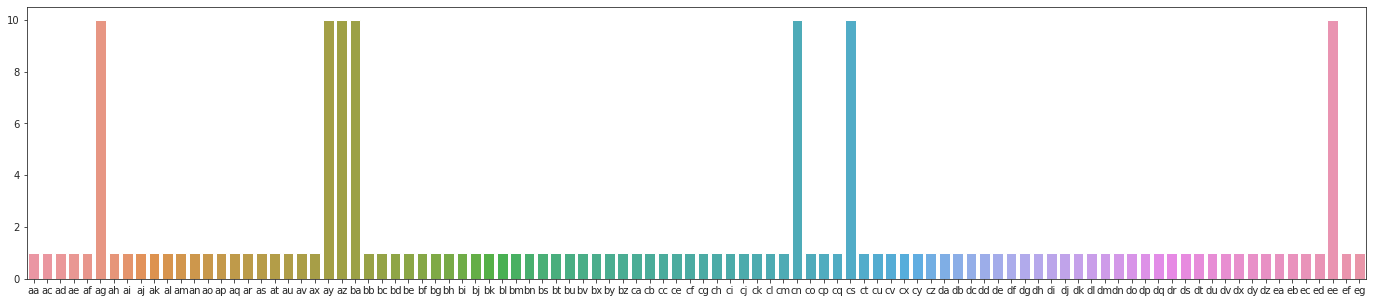

In [61]:
# Plotting the same
plt.figure(figsize=(24,5))
sns.barplot(x = feature_prefix,y = bin_count)
plt.show()

**Observation:**

We can see that there are 7 sets of features having 10 bins each. In other words, there are **7 histograms divided into 10 bins each**. 

eg: Identifier 'ag' consists of ag_000, ag_001, ag_002, ag_003, ag_004, ag_005, ag_006, ag_007, ag_008 and ag_009

In [62]:
# Getting the Identifier of the histogram features
hist_identifier = [feature_prefix[i] for i,j in enumerate(bin_count) if j==10]
print("The Histogram Identifiers are: ",hist_identifier)

# Getting the names of the features having histograms bin information
hist_features = [i for i in x_train.columns if i.split('_')[0] in hist_identifier]
print("\nThere are",len(hist_features),"features that contain histogram bin information and they are: \n",hist_features)

The Histogram Identifiers are:  ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']

There are 70 features that contain histogram bin information and they are: 
 ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']


#### Seperating Histogram Features from the rest

In [63]:
histogram_data = imputed_x_train[hist_features]
x_without_hist = imputed_x_train.drop(hist_features,axis=1)

**We will select the top features from both the datasets using the complete imputed set. But the Analysis will be performed on the data having missing values.**

## Part 4 Histogram Feature Selection

### Select Top Features

Now, we will perform data analysis on the top 15 features from our histogram dataset.
For selecting the features, we will perform **Recursive Feature Elimination**.

In [64]:
def get_top(df,y,n):
    """
    This function returns the top n features,
    by performing Recursive Feature Elimination
    using Random Forest Classifier
    """
    # Use RFE algorithm from sklearn to perform feature selection
    feature_select = RFE(estimator=RandomForestClassifier(n_estimators=150,max_depth=5,random_state=1),
                         n_features_to_select=n,
                         verbose=5)
    feature_select.fit(df,y)

    # support_ gives an array of True/False for each feature where True signifies that the feature is selected
    top_f = [ c for i,c in enumerate(df.columns.tolist()) if feature_select.support_[i] ]   
    return top_f

top_feature_hist = get_top(histogram_data,y_train,15)
print("The top features selected after Recursive Feature Elimination are: \n",top_feature_hist)

Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 fe

In [65]:
# Create a dataframe which is a subset of our original dataset and consists of only the top features and the Expected label

# WE WILL BE USING THE DATA WHICH CONSISTS OF MISSING VALUES FOR OUR EDA
top_features = pd.DataFrame(data=x_train[top_feature_hist],columns=top_feature_hist)
top_features['Expected'] = y_train
top_features.head()

,ag_001,ag_002,ag_003,ay_005,ay_006,ay_008,ba_004,ba_005,cn_000,cn_001,cn_004,cs_002,ee_000,ee_004,ee_005,Expected
0,0.0,0.0,11968.0,0.0,11566.0,792862.0,67724.0,46580.0,0.0,0.0,257490.0,122076.0,261256.0,228040.0,89664.0,0
1,0.0,0.0,0.0,271500.0,1886072.0,243582.0,118462.0,100180.0,0.0,0.0,755918.0,89558.0,730520.0,612436.0,441664.0,0
2,0.0,0.0,0.0,0.0,11452.0,1046.0,46.0,308.0,0.0,0.0,3986.0,26.0,8392.0,78.0,40.0,0
3,0.0,0.0,0.0,23678.0,262632.0,1195414.0,135238.0,116362.0,0.0,0.0,690630.0,133378.0,406100.0,267896.0,307242.0,0
4,0.0,0.0,0.0,14428.0,1116896.0,240138.0,175256.0,148856.0,0.0,0.0,1730054.0,105016.0,499146.0,458620.0,422742.0,0


## Top Histogram Features Analysis

### Univariate Analysis of Histogram Features


Feature 'ag_001' , Class Label 1, Mean: 37542.36
Standard Deviation 200996.39 

Feature 'ag_001' , Class Label 0, Mean: 104.35
And Standard Deviation is 5316.33 


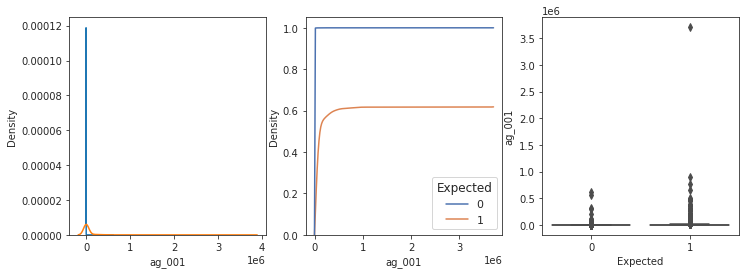

****************************************************************************************************
Feature 'ag_002' , Class Label 1, Mean: 321513.71
Standard Deviation 772325.97 

Feature 'ag_002' , Class Label 0, Mean: 1010.13
And Standard Deviation is 15842.28 


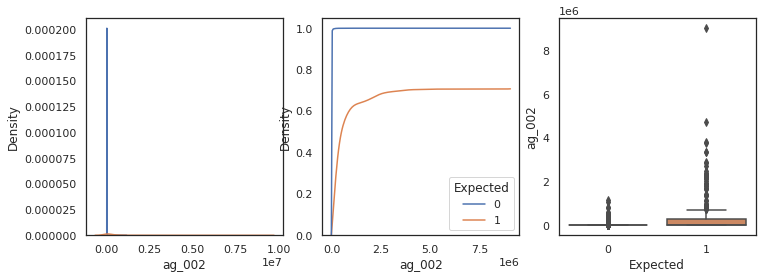

****************************************************************************************************
Feature 'ag_003' , Class Label 1, Mean: 2088414.67
Standard Deviation 3296328.64 

Feature 'ag_003' , Class Label 0, Mean: 28737.56
And Standard Deviation is 221848.73 


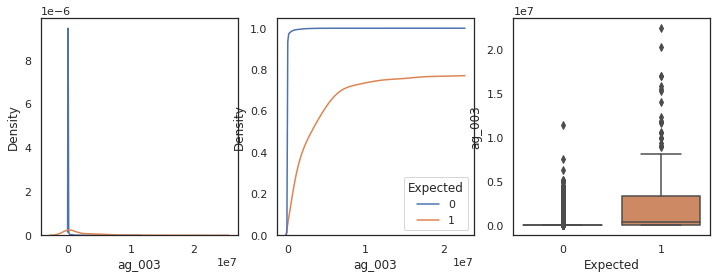

****************************************************************************************************
Feature 'ay_005' , Class Label 1, Mean: 761239.51
Standard Deviation 3187741.16 

Feature 'ay_005' , Class Label 0, Mean: 54418.23
And Standard Deviation is 584034.07 


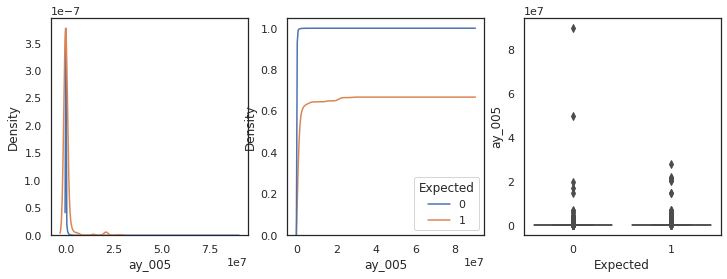

****************************************************************************************************
Feature 'ay_006' , Class Label 1, Mean: 5044878.33
Standard Deviation 10777959.62 

Feature 'ay_006' , Class Label 0, Mean: 889459.58
And Standard Deviation is 2003297.99 


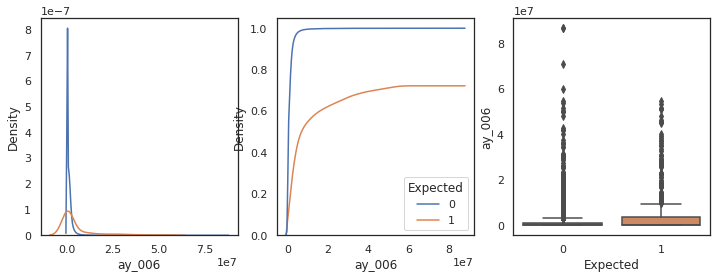

****************************************************************************************************
Feature 'ay_008' , Class Label 1, Mean: 13116878.5
Standard Deviation 14475378.25 

Feature 'ay_008' , Class Label 0, Mean: 669488.1
And Standard Deviation is 2262210.94 


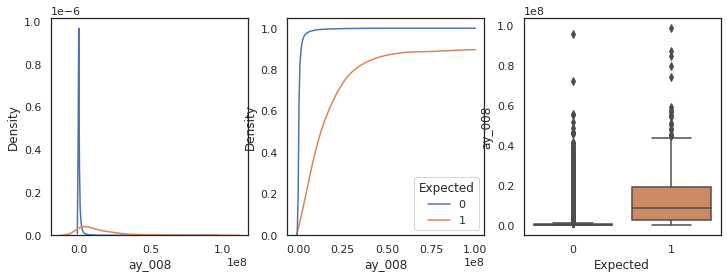

****************************************************************************************************
Feature 'ba_004' , Class Label 1, Mean: 1663295.05
Standard Deviation 1571775.52 

Feature 'ba_004' , Class Label 0, Mean: 143706.11
And Standard Deviation is 263479.32 


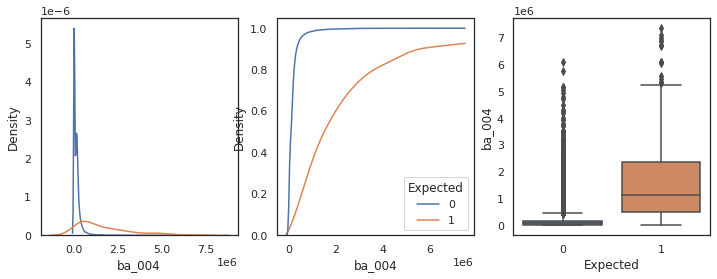

****************************************************************************************************
Feature 'ba_005' , Class Label 1, Mean: 1520675.79
Standard Deviation 1603775.51 

Feature 'ba_005' , Class Label 0, Mean: 135902.68
And Standard Deviation is 262584.47 


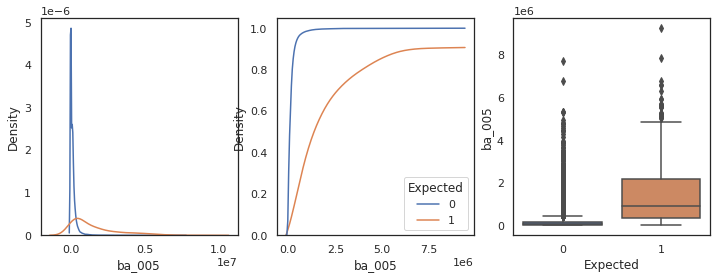

****************************************************************************************************
Feature 'cn_000' , Class Label 1, Mean: 118820.42
Standard Deviation 447641.87 

Feature 'cn_000' , Class Label 0, Mean: 321.89
And Standard Deviation is 7472.67 


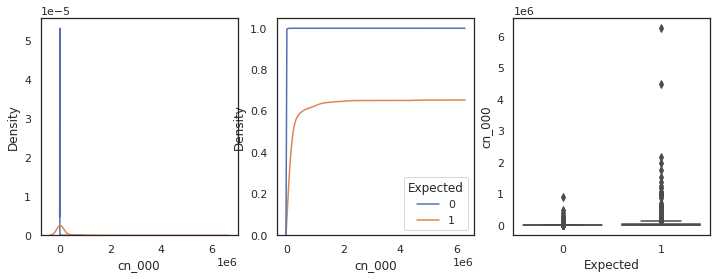

****************************************************************************************************
Feature 'cn_001' , Class Label 1, Mean: 622592.26
Standard Deviation 1231891.88 

Feature 'cn_001' , Class Label 0, Mean: 6332.91
And Standard Deviation is 60576.13 


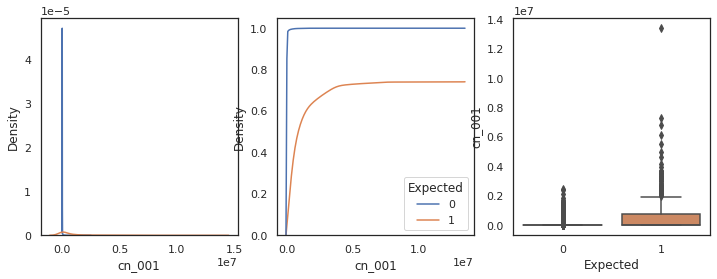

****************************************************************************************************
Feature 'cn_004' , Class Label 1, Mean: 10314945.18
Standard Deviation 10261180.47 

Feature 'cn_004' , Class Label 0, Mean: 894910.67
And Standard Deviation is 1747396.5 


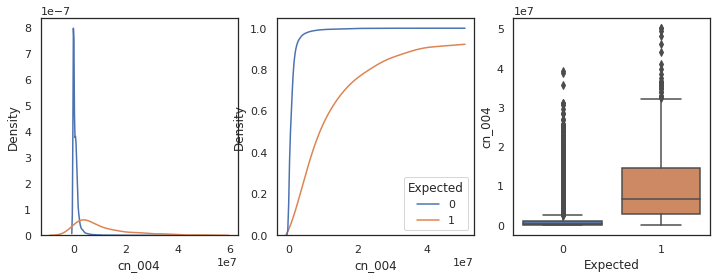

****************************************************************************************************
Feature 'cs_002' , Class Label 1, Mean: 2935176.86
Standard Deviation 3436534.74 

Feature 'cs_002' , Class Label 0, Mean: 127736.08
And Standard Deviation is 714453.06 


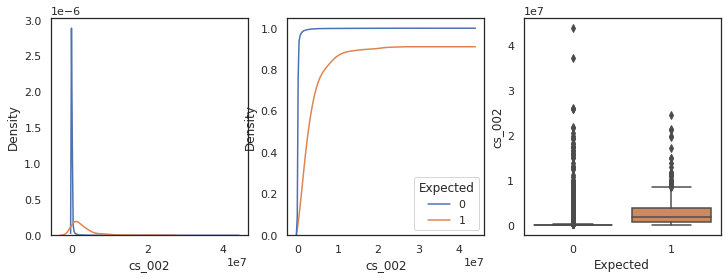

****************************************************************************************************
Feature 'ee_000' , Class Label 1, Mean: 6458899.92
Standard Deviation 6620235.61 

Feature 'ee_000' , Class Label 0, Mean: 490883.42
And Standard Deviation is 1300770.64 


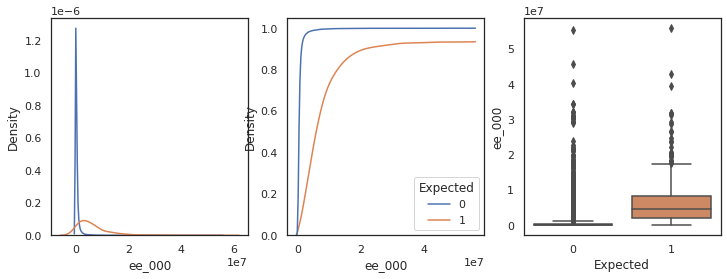

****************************************************************************************************
Feature 'ee_004' , Class Label 1, Mean: 3535203.78
Standard Deviation 3999498.03 

Feature 'ee_004' , Class Label 0, Mean: 336115.43
And Standard Deviation is 623099.96 


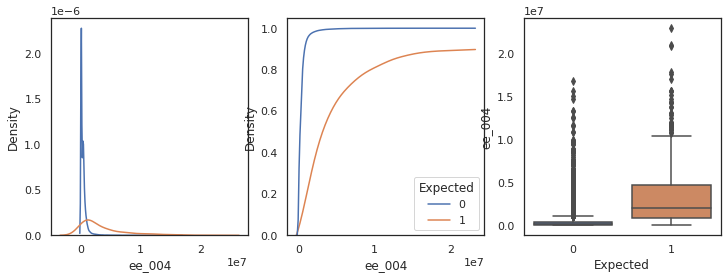

****************************************************************************************************
Feature 'ee_005' , Class Label 1, Mean: 3637966.13
Standard Deviation 3898699.01 

Feature 'ee_005' , Class Label 0, Mean: 286492.6
And Standard Deviation is 506792.29 


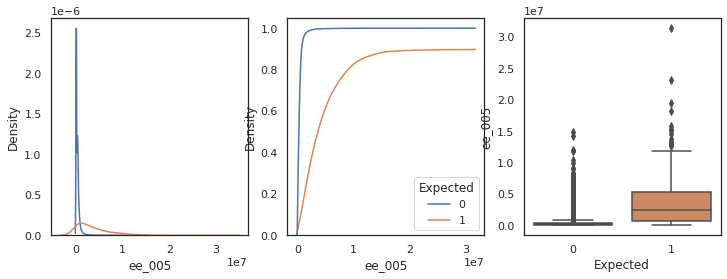

****************************************************************************************************


In [66]:
def plots(x):
    """
    This function prints Mean and Std. Deviation of points of each Expected,
    plots the Probability Density Function,Cumulative Density Function 
    and the Box-Plot of each feature of the given data
    """
    for n in x.columns.tolist():
        if n != 'Expected':

            describe_0 = x[x['Expected']==0].describe()
            describe_1 = x[x['Expected']==1].describe()

            fig,ax = plt.subplots(1,3,figsize=(12,4))
            
            print( '\033[1m' + "Feature '{}' , Class Label 1, Mean: {}".format(n , round(describe_1[n].iloc[1],2) ) )
            print( "Standard Deviation {} ".format( round(describe_1[n].iloc[2],2) ) )
            print( "\nFeature '{}' , Class Label 0, Mean: {}".format(n , round(describe_0[n].iloc[1],2) ) )
            print( "And Standard Deviation is {} ".format( round(describe_0[n].iloc[2],2) ) )
            
            sns.set_theme(style='white')
            # Plot PDF of points belonging to negative Expected
            sns.distplot(x[x['Expected']==0][n],ax=ax[0],hist=False)
            # Plot PDF of points belonging to positive Expected 
            sns.distplot(x[x['Expected']==1][n],ax=ax[0],hist=False)
            # Plot CDF of the feature values
            sns.kdeplot(data=x, x=x[n], hue="Expected",cumulative=True, common_norm=False, common_grid=True,ax=ax[1])
            # Plot the Box-Plot
            sns.boxplot(x=x['Expected'],y=x[n],ax=ax[2])
            plt.show()
            print('*'*100)

plots(top_features)

### Checking for Correlation Between the Top Features + Bivariate Analysis
Here we will check how each top feature is correlated w.r.t to other top features using the Pearson Correaltion Value. 

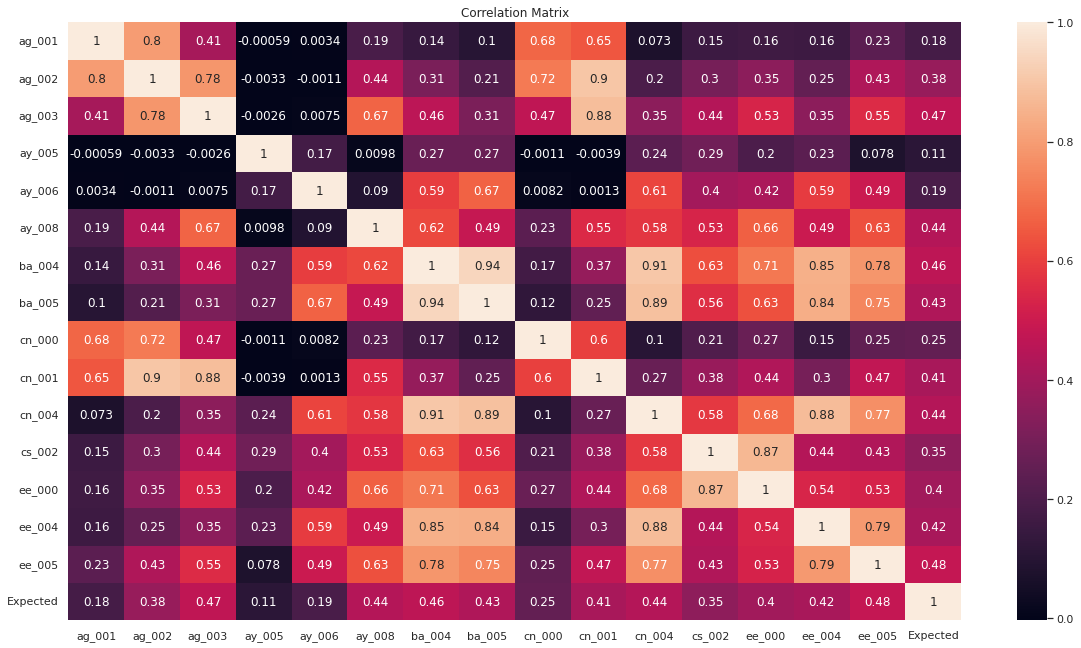

In [67]:
# Plot Correlation Heatmap      
plt.figure(figsize=(20,11))
sns.heatmap(top_features.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

**Which feature is the most uncorrelated w.r.t the target variable?** 

In [68]:
# Getting correlation coeffiecients of features w.r.t Expected/class
correlation_values = top_features.corr().loc['Expected']

# Get top 5 features
top_correlated_features = correlation_values.sort_values().iloc[:5].index.tolist()
print("Most Uncorrelated Feature is",top_correlated_features[0])

Most Uncorrelated Feature is ay_005


Variation of top features w.r.t feature ay_005


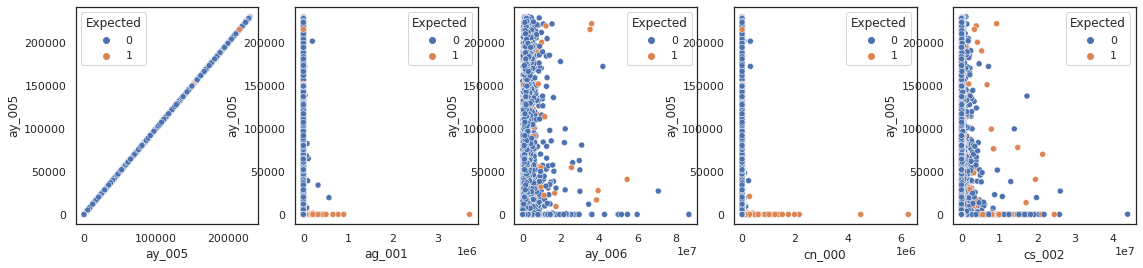

In [69]:
def plot_scatter(df,feature,percentile_value):
    """
    This function plots scatter plots between 
    all the features of the dataframe, w.r.t a given feature
    """
    fig,ax = plt.subplots(1,5,figsize=(19,4))

    # Only include the data consisting of values below the given percentile
    p = np.nanpercentile(df[feature],percentile_value)
    df = df[df[feature]<p]
    
    columns = df.columns.tolist()
    for i in range(len(columns)):
        if columns[i] !='Expected':
            # Plot scatterplot between 2 given features
            sns.scatterplot(x=df[columns[i]],y=df[feature],hue=df['Expected'],ax=ax[i])
    plt.show()


print('\033[1m'+"Variation of top features w.r.t feature",top_correlated_features[0])
plot_scatter(top_features[top_correlated_features + ['Expected']],top_correlated_features[0],95)

## Part 5 Numerical Feature Selection

### Select Top Features


In [70]:
# Calling the function created earlier to select top features
top_feature_num = get_top(x_without_hist , y_train , 15)
print("The top features selected after Recursive Feature Elimination are: \n",top_feature_num)

Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 fe

In [71]:
# Create a dataframe which is a subset of our original dataset and consists of only the top features and the Expected label

# WE WILL BE USING THE DATA WHICH CONSISTS OF MISSING VALUES FOR OUR EDA
top_features = pd.DataFrame(data=x_train[top_feature_num],columns=top_feature_num)
top_features['Expected'] = y_train
top_features.head()

,al_000,am_0,ap_000,aq_000,bb_000,bj_000,bu_000,bv_000,bx_000,by_000,cj_000,cq_000,dn_000,do_000,dy_000,Expected
0,18342.0,27340.0,281252.0,140318.0,1585534.0,178580.0,1585534.0,1585534.0,1556512.0,6737.0,0.00,1585534.0,11218.0,4176.0,23238.0,0
1,0.0,0.0,967210.0,373830.0,4015700.0,340770.0,4015700.0,4015700.0,4006076.0,21272.0,57924.48,4015700.0,25916.0,42146.0,19144.0,0
2,0.0,0.0,4334.0,1590.0,22660.0,3484.0,22660.0,22660.0,29628.0,31.0,0.00,22660.0,154.0,0.0,0.0,0
3,0.0,0.0,292066.0,190036.0,2580364.0,127494.0,2580364.0,2580364.0,2585130.0,15647.0,0.00,2580364.0,14090.0,28384.0,796.0,0
4,322.0,668.0,656522.0,448742.0,4059882.0,285442.0,4059882.0,4059882.0,4065500.0,25311.0,0.00,4059882.0,30566.0,0.0,0.0,0


## Top Numerical Features Analysis

### Univariate Analysis of Numerical Features

Feature 'al_000' , Class Label 1, Mean: 1268417.57
Standard Deviation 2421524.71 

Feature 'al_000' , Class Label 0, Mean: 22163.54
And Standard Deviation is 226403.89 


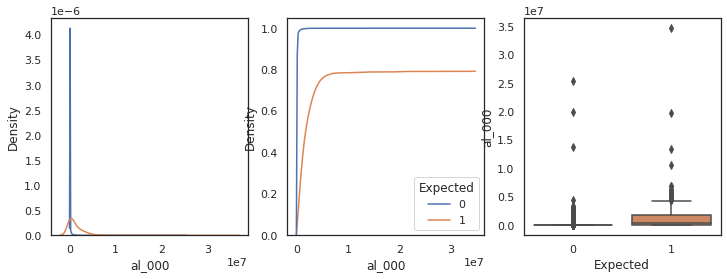

****************************************************************************************************
Feature 'am_0' , Class Label 1, Mean: 1906984.91
Standard Deviation 3436622.92 

Feature 'am_0' , Class Label 0, Mean: 33049.11
And Standard Deviation is 344720.69 


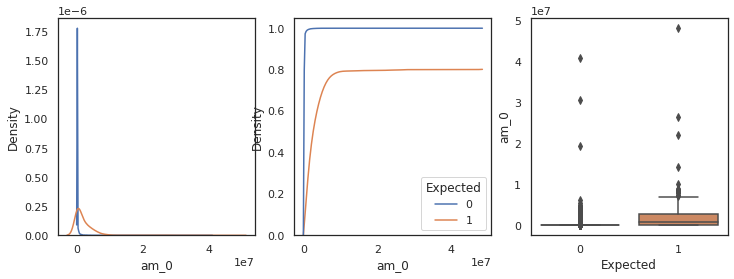

****************************************************************************************************
Feature 'ap_000' , Class Label 1, Mean: 10040281.46
Standard Deviation 7695329.73 

Feature 'ap_000' , Class Label 0, Mean: 642348.4
And Standard Deviation is 1619224.96 


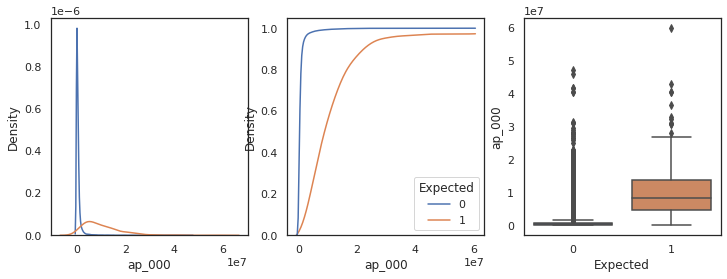

****************************************************************************************************
Feature 'aq_000' , Class Label 1, Mean: 4509408.79
Standard Deviation 3499917.93 

Feature 'aq_000' , Class Label 0, Mean: 303129.59
And Standard Deviation is 691100.41 


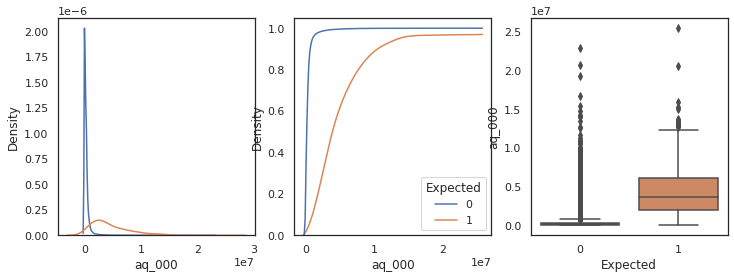

****************************************************************************************************
Feature 'bb_000' , Class Label 1, Mean: 41655729.95
Standard Deviation 26495221.84 

Feature 'bb_000' , Class Label 0, Mean: 3242157.12
And Standard Deviation is 6486905.51 


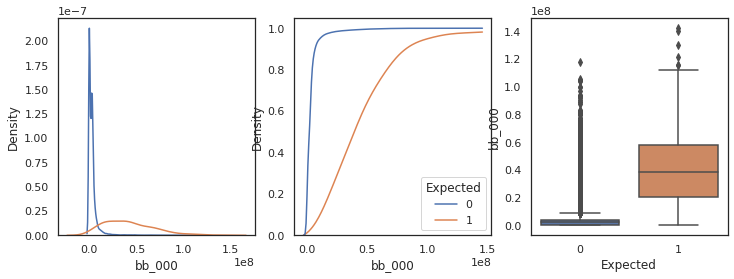

****************************************************************************************************
Feature 'bj_000' , Class Label 1, Mean: 5596216.46
Standard Deviation 4375141.05 

Feature 'bj_000' , Class Label 0, Mean: 300527.32
And Standard Deviation is 829263.99 


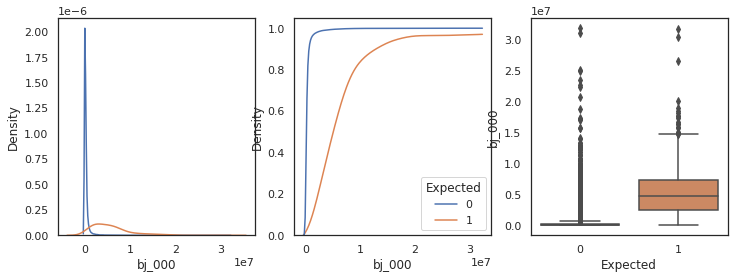

****************************************************************************************************
Feature 'bu_000' , Class Label 1, Mean: 41655709.15
Standard Deviation 26495208.88 

Feature 'bu_000' , Class Label 0, Mean: 3242156.63
And Standard Deviation is 6486904.72 


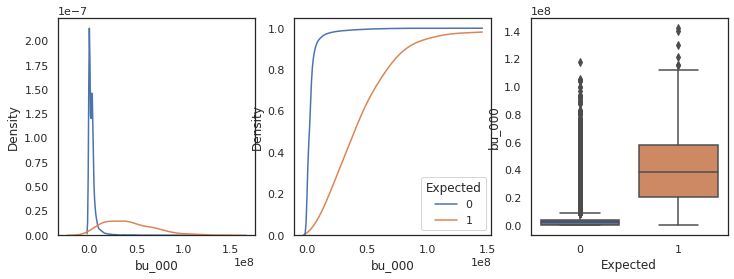

****************************************************************************************************
Feature 'bv_000' , Class Label 1, Mean: 41655726.25
Standard Deviation 26495215.72 

Feature 'bv_000' , Class Label 0, Mean: 3242157.08
And Standard Deviation is 6486905.49 


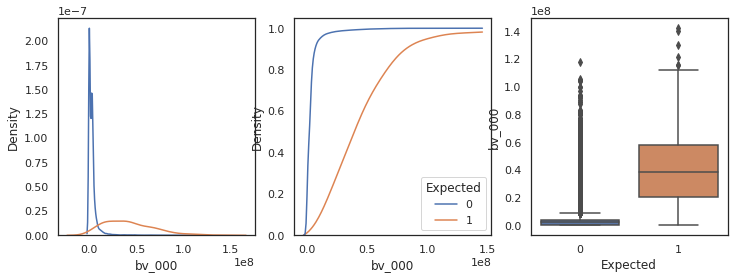

****************************************************************************************************
Feature 'bx_000' , Class Label 1, Mean: 35503186.98
Standard Deviation 26827981.14 

Feature 'bx_000' , Class Label 0, Mean: 3017561.29
And Standard Deviation is 5878691.83 


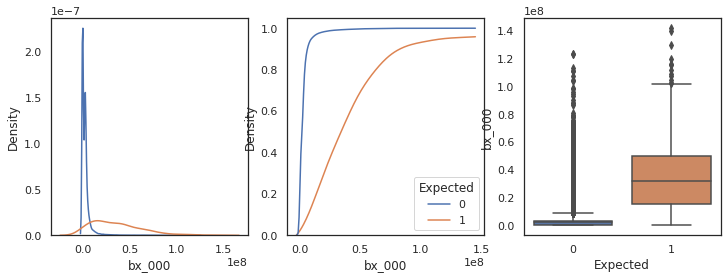

****************************************************************************************************
Feature 'by_000' , Class Label 1, Mean: 188518.65
Standard Deviation 168904.85 

Feature 'by_000' , Class Label 0, Mean: 15871.02
And Standard Deviation is 29495.57 


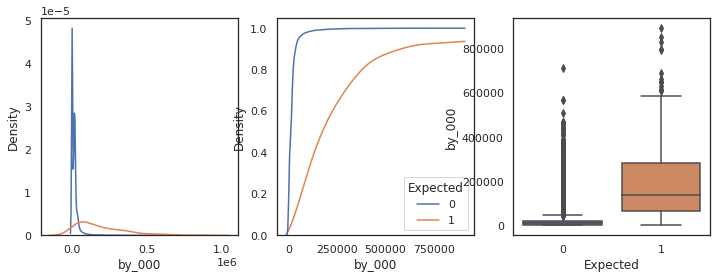

****************************************************************************************************
Feature 'cj_000' , Class Label 1, Mean: 2546840.3
Standard Deviation 5656224.32 

Feature 'cj_000' , Class Label 0, Mean: 40789.24
And Standard Deviation is 449241.32 


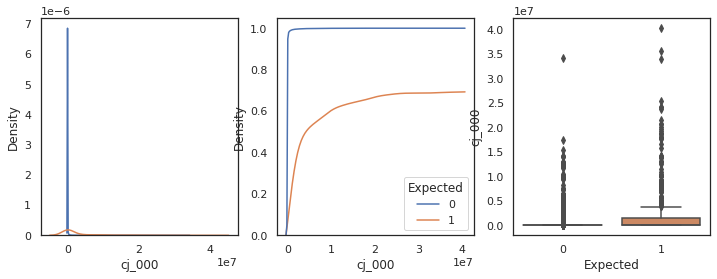

****************************************************************************************************
Feature 'cq_000' , Class Label 1, Mean: 41655709.23
Standard Deviation 26495209.05 

Feature 'cq_000' , Class Label 0, Mean: 3242156.9
And Standard Deviation is 6486905.57 


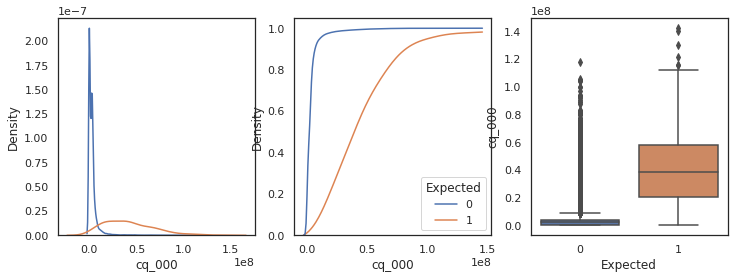

****************************************************************************************************
Feature 'dn_000' , Class Label 1, Mean: 347868.47
Standard Deviation 268903.1 

Feature 'dn_000' , Class Label 0, Mean: 23630.88
And Standard Deviation is 58836.18 


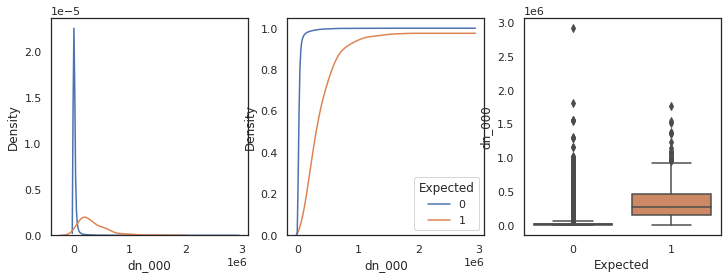

****************************************************************************************************
Feature 'do_000' , Class Label 1, Mean: 244798.66
Standard Deviation 311328.7 

Feature 'do_000' , Class Label 0, Mean: 26474.58
And Standard Deviation is 47297.84 


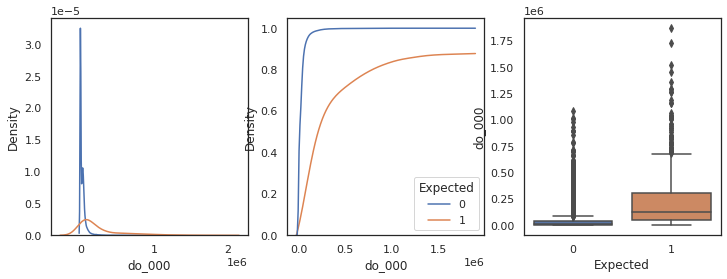

****************************************************************************************************
Feature 'dy_000' , Class Label 1, Mean: 72758.99
Standard Deviation 196343.51 

Feature 'dy_000' , Class Label 0, Mean: 7460.69
And Standard Deviation is 59926.32 


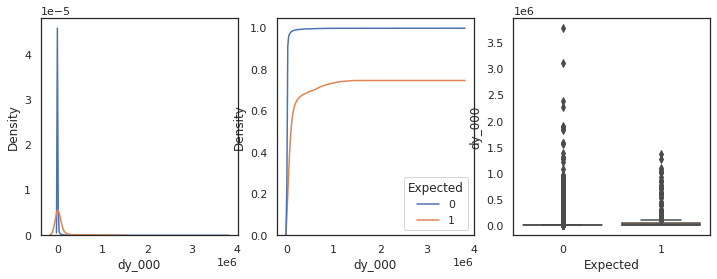

****************************************************************************************************


In [72]:
# Calling the plot function created earlier
plots(top_features)

### Checking for Correlation Between the Top Features + Bivariate Analysis
Here we will check how each top feature is correlated w.r.t to other top features using the Pearson Correaltion Value. 

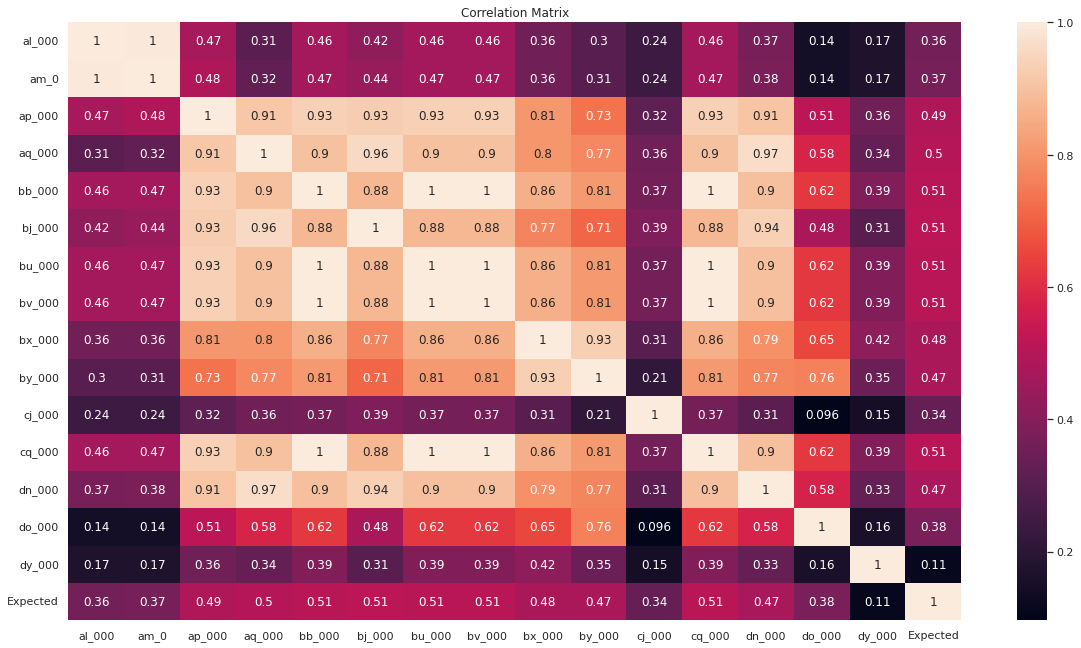

In [73]:
# Plot Correlation Heatmap      
plt.figure(figsize=(20,11))
sns.heatmap(top_features.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

**Which feature is the most uncorrelated w.r.t the target variable?** 

In [74]:
# Getting correlation coeffiecients of features w.r.t Expected
correlation_values = top_features.corr().loc['Expected']

# Get top 5 features
top_correlated_features = correlation_values.sort_values().iloc[:5].index.tolist()
print("Most Uncorrelated Feature is",top_correlated_features[0])

Most Uncorrelated Feature is dy_000


Variation of top features w.r.t feature dy_000


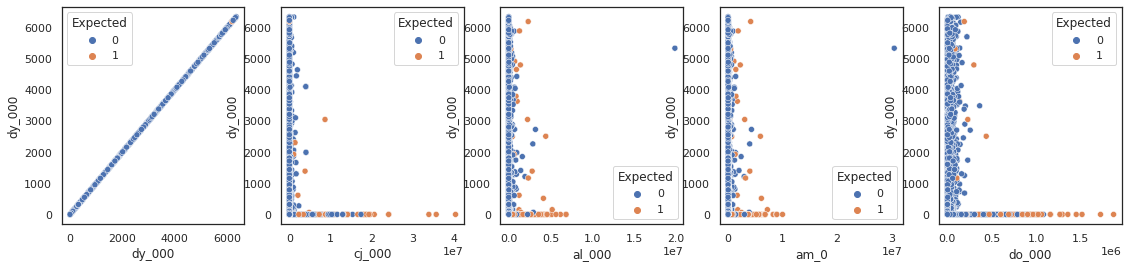

In [75]:
print('\033[1m'+"Variation of top features w.r.t feature",top_correlated_features[0])
# Calling the plot function created earlier
plot_scatter(top_features[top_correlated_features + ['Expected']],top_correlated_features[0],90)

# Part 6 Feature Engineering

## Loading the dataset

In [78]:
# Loading our dataset consisting of imputed data
X_train = pd.read_csv("/kaggle/working/imputed_train_data.csv")
Y_train = X_train['Expected']
X_train = X_train.drop('Expected',axis=1)

## Scaling our Data

In [80]:
def scale_data(df):
    """
    This function transforms features 
    by scaling each feature to a given range
    """
    min_max = MinMaxScaler()
    df = pd.DataFrame( data = min_max.fit_transform(df) , columns = df.columns )
    return df , min_max

## Synthetic Minority Oversampling Technique (SMOTE) for Imbalanced dataset

In [81]:
def balance_data(df,label):
    """
    This function balances the dataset by 
    creating dulicates of minority class points
    """
    over = SMOTE(sampling_strategy=0.3)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    df, label = pipeline.fit_resample(df, label)
    return df, label

X_train , Y_train = balance_data(X_train, Y_train)
print(X_train.shape)
print(Y_train.value_counts())

(33090, 163)
0    22060
1    11030
Name: Expected, dtype: int64


## Saving our data

In [82]:
# Code to save our csv file to avoid re-doing above processing every time
# For TRAIN DATA
df_to_save = X_train.copy()
df_to_save['Expected'] = Y_train
df_to_save.to_csv("/kaggle/working/final_train_data.csv",index=False)

In [85]:
# Loading our dataset consisting of imputed data
X_train = pd.read_csv("/kaggle/working/final_train_data.csv")
Y_train = X_train['Expected']
X_train = X_train.drop('Expected',axis=1)

# Loading Test data
X_test = pd.read_csv("/kaggle/working/imputed_test_data.csv")
Y_test = X_test['Expected']

X_test = X_test.drop('Expected',axis=1)
#X_test = X_test

### Preparing Scaled data for Linear models

In [86]:
X_train_scale,scaler = scale_data(X_train)
X_test_scale = pd.DataFrame(data = scaler.transform(X_test) , columns=X_test.columns)
print(X_train_scale.shape,X_test_scale.shape)

(33090, 163) (17100, 163)


# Modelling

In [2]:
median = x_test.median()
x_test= x_test.fillna(value=median)

#my_imputer = SimpleImputer()
#x_test = my_imputer.fit_transform(x_test)

NameError: name 'x_test' is not defined

In [87]:
def tuning( x , y , model , params , cv=10 ,verbose=10 ):
    """
    This function performs HyperParameter Tuning
    using GridSearchCV for the given model and it's parameters
    """
    
    scorer = make_scorer(fbeta_score, beta=3)
    # Define the model that performs Hyperparameter tuning
    clf = GridSearchCV(estimator= model,
                       param_grid= params,
                       scoring= scorer,
                       cv= cv,                         
                       verbose= verbose,
                       n_jobs= -1)
    
    # Fit the model to the dataset
    clf.fit( x , y )
    return clf.best_params_ , clf.best_score_    

In [88]:
def plot_confusion( y_test , y_hat ):
    """
    This function plots the Confusion Matrix
    based on the true and predicted Expected labels
    """    
    # Show Confusion Matrix Heatmap
    cf_matrix_test = confusion_matrix(y_test , y_hat)
        
    group_names = ["TN","FP","FN","TP"]
    group_counts = ["{}".format(value) for value in cf_matrix_test.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [120]:
def model_results_pred( model , x_train , x_test , y_train , y_test):
    """
    This function predicts class label of the data,
    and returns the Macro-F3 Score
    """
    # Predic class labels
    y_train_hat = model.predict(x_train)
    y_test_hat = model.predict(x_test) 
    scorer = fbeta_score(y_test, y_test_hat,average='macro', beta = 3.0 )
    
    print('\033[1m'+'Macro-F3 Score: ',scorer)
    
    # Plot Test Confusion Matrix
    print("\tTest Confusion Matrix")
    plot_confusion(y_test,y_test_hat)
    
    return scorer

## Baseline Model using DummyClassifier
We will predict all Expected labels to be 0 (majority Expected) and calculate the F3 score for the same. We can use sklearn's DummyClassifier to obtain our baseline results.

Macro-F3 Score:  0.4991117527880268
	Test Confusion Matrix


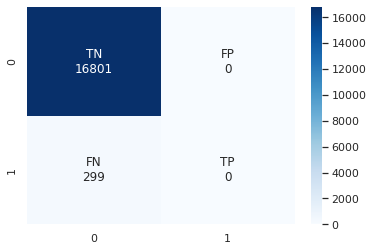

In [121]:
dummy_model = DummyClassifier(strategy='constant',constant=0)
dummy_model.fit(X_train,Y_train)
#Y_train[['Expected']].to_csv('LogisticRegression_Submission.csv')
F3_Base = model_results_pred( dummy_model , X_train , X_test , Y_train , Y_test)

# Save predictions to CSV file/ its automatically generated from open AI
#submission_df = pd.DataFrame({'Expected': y_test_hat})
#submission_df.to_csv("submission.csv", index=False)

In [137]:
print (x_test)

            Id    aa_000        ac_000        ad_000         ae_000  \
0          0.0     240.0  4.200000e+01  2.600000e+01       0.000000   
1          1.0   82082.0  2.320000e+02  2.300000e+02       0.000000   
2          2.0   39670.0  2.130706e+09  2.100000e+02       0.000000   
3          3.0   39398.0  6.400000e+01  6.542762e+04       0.000000   
4          4.0  263566.0  1.580000e+02  1.169987e+06  704967.134556   
...        ...       ...           ...           ...            ...   
17095  17095.0       2.0  8.000000e+00  6.000000e+00       0.000000   
17096  17096.0      28.0  2.130706e+09  2.000000e+01       0.000000   
17097  17097.0      14.0  1.000000e+01  1.000000e+01       0.000000   
17098  17098.0   38164.0  3.200000e+02  2.480000e+02       0.000000   
17099  17099.0   31104.0  2.130706e+09  6.540000e+02       0.000000   

              af_000  ag_000  ag_001   ag_002    ag_003  ...     ee_002  \
0           0.000000     0.0     0.0      0.0       0.0  ...     1138.0 

## Logistic Regression

### HyperParameter Tuning

In [91]:
# Defining the different parameters for tuning
params = {'C': np.random.uniform(0.001,1,5), 'tol':np.random.uniform(0.0001,0.1,5) }

# Obtain best hyperparameters
best_params_log , best_score_log = tuning(X_train_scale,
                                          Y_train,
                                          LogisticRegression(n_jobs=-1,random_state=42),
                                          params,
                                          cv=10,
                                          verbose=2)


print(" Best Parameters:",best_params_log,"with score of:",best_score_log)


Fitting 10 folds for each of 25 candidates, totalling 250 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


 Best Parameters: {'C': 0.8299041393291239, 'tol': 0.07239397179467306} with score of: 0.9204156722338507


### Training & Testing

Macro-F3 Score:  0.10628388913354114
	Test Confusion Matrix


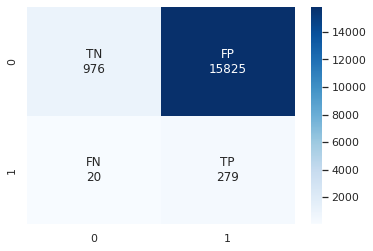

In [93]:
LR_model = LogisticRegression(C= best_params_log['C'],
                              tol= best_params_log['tol'],
                              n_jobs=-1, 
                              random_state=42)

LR_model.fit(X_train_scale,Y_train)

F3_LR = model_results_pred( LR_model , X_train_scale , X_test_scale , Y_train , Y_test)


## SGDClassifier with HingeLoss

### HyperParameter Tuning

In [94]:
# Defining the different parameters for tuning
params = {'penalty': ['l1','l2'], 'alpha':np.random.uniform(0.0001,0.1,9) }

# Obtain best hyperparameters
best_params_sgd , best_score_sgd = tuning(X_train_scale,
                                          Y_train,
                                          SGDClassifier(n_jobs=-1,random_state=0),
                                          params,
                                          cv=10,
                                          verbose=1)


print(" Best Parameters:",best_params_sgd,"with score of:",best_score_sgd)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
 Best Parameters: {'alpha': 0.00012048740086080408, 'penalty': 'l1'} with score of: 0.9361583893085694


### Training and Testing

Macro-F3 Score:  0.08563794646429734
	Test Confusion Matrix


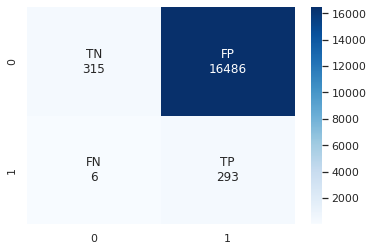

In [95]:
SVM_model = SGDClassifier(penalty= best_params_sgd['penalty'],
                          alpha= best_params_sgd['alpha'],
                          n_jobs= -1,
                          random_state= 0)

SVM_model.fit(X_train_scale,Y_train)

F3_SVM = model_results_pred( SVM_model , X_train_scale , X_test_scale , Y_train , Y_test )

## Naive Bayes

### HyperParameter Tuning

In [96]:
# Defining the different parameters for tuning
params = {'var_smoothing': np.random.uniform(1e-16,1e-14,100)}

# Obtain best hyperparameters
best_params_nb , best_score_nb = tuning(X_train,
                                        Y_train,
                                        GaussianNB(),
                                        params,
                                        cv=10,
                                        verbose=2)


print(" Best Parameters:",best_params_nb,"with score of:",best_score_nb)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ......C=0.4449103776566736, tol=0.09550928068000453; total time=   2.2s
[CV] END ......C=0.4449103776566736, tol=0.09550928068000453; total time=   2.2s
[CV] END ......C=0.4449103776566736, tol=0.08665938225498533; total time=   1.8s
[CV] END ......C=0.4449103776566736, tol=0.08665938225498533; total time=   2.7s
[CV] END ......C=0.4449103776566736, tol=0.08665938225498533; total time=   2.2s
[CV] END ......C=0.4449103776566736, tol=0.07239397179467306; total time=   1.7s
[CV] END ......C=0.4449103776566736, tol=0.07239397179467306; total time=   2.1s
[CV] END .....C=0.4449103776566736, tol=0.031756648809619745; total time=   2.1s
[CV] END .....C=0.4449103776566736, tol=0.031756648809619745; total time=   2.0s
[CV] END .....C=0.4449103776566736, tol=0.031756648809619745; total time=   2.2s
[CV] END ......C=0.4449103776566736, tol=0.07116779041989414; total time=   1.9s
[CV] END ......C=0.4449103776566736, tol=0.0

### Training & Testing

Macro-F3 Score:  0.196557624570462
	Test Confusion Matrix


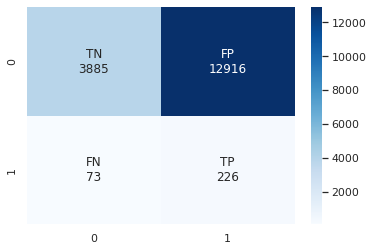

In [138]:
# Defining our model
NB_model = GaussianNB(var_smoothing=best_params_nb['var_smoothing'])


# Fit and predict, and obtain train and test scores
NB_model.fit(X_train,Y_train)

F3_NB = model_results_pred(NB_model , X_train , X_test , Y_train , Y_test)

## Decision Tree Classifier

### HyperParameter Tuning

In [139]:
# Defining the different parameters for tuning
params = {'max_depth': np.random.randint(10,25,5)}

# Obtain best hyperparameters
best_params_dt , best_score_dt = tuning(X_train,
                                        Y_train,
                                        DecisionTreeClassifier(),
                                        params,
                                        cv=11)


print(" Best Parameters:",best_params_dt,"with score of:",best_score_dt)

Fitting 11 folds for each of 5 candidates, totalling 55 fits
 Best Parameters: {'max_depth': 23} with score of: 0.9863142312438465


### Training & Testing

Macro-F3 Score:  0.4878322522903948
	Test Confusion Matrix


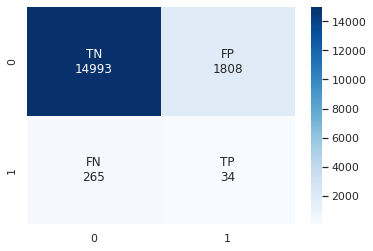

In [99]:
# Defining our model
DT_model = DecisionTreeClassifier(max_depth = best_params_dt['max_depth'])

# Fit and predict, and obtain train and test scores
DT_model.fit(X_train,Y_train)

F3_DT = model_results_pred( DT_model , X_train , X_test , Y_train , Y_test)

## Random Forest

### HyperParameter Tuning

In [140]:
params = {'n_estimators': [300,500,600,650,700],
          'max_depth': [80,110,125,135]}


# Obtain best hyperparameters
best_params_rf , best_score_rf = tuning(X_train,
                                        Y_train,
                                        RandomForestClassifier(n_jobs= -1 , verbose= 1),
                                        params,
                                        cv=7)


print(" Best Parameters:",best_params_rf,"with score of:",best_score_rf)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tas

KeyboardInterrupt: 

### Training and Testing

In [141]:
# Defining our model
RF_model = RandomForestClassifier(n_estimators = best_params_rf['n_estimators'],
                                  max_depth = best_params_rf['max_depth'],
                                  n_jobs = -1,
                                  verbose = 0)


# Fit and predict, and obtain train and test scores
RF_model.fit(X_train,Y_train)
# Fit and predict, and obtain train and test scores
F3_RF = model_results_pred(RF_model , X_train , X_test , Y_train , Y_test)

NameError: name 'best_params_rf' is not defined

## Gradient Boosted Decision Trees

### HyperParameter Tuning

In [142]:
params = {'n_estimators':[100, 250,350,500],
          'max_depth': [4,6,10,15],
          'learning_rate':[0.001,0.01,0.1,1,10]}


# Obtain best hyperparameters
best_params_gb , best_score_gb = tuning(X_train,
                                        Y_train,
                                        LGBMClassifier(n_jobs=-1,random_state=42),
                                        params,
                                        cv=6)


print(" Best Parameters:",best_params_gb,"with score of:",best_score_gb)

Fitting 6 folds for each of 80 candidates, totalling 480 fits
[CV 1/6; 1/80] START learning_rate=0.001, max_depth=4, n_estimators=100.........
[CV 1/6; 1/80] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.000 total time=   5.2s
[CV 1/6; 2/80] START learning_rate=0.001, max_depth=4, n_estimators=250.........
[CV 1/6; 2/80] END learning_rate=0.001, max_depth=4, n_estimators=250;, score=0.000 total time=  10.9s
[CV 5/6; 2/80] START learning_rate=0.001, max_depth=4, n_estimators=250.........
[CV 5/6; 2/80] END learning_rate=0.001, max_depth=4, n_estimators=250;, score=0.000 total time=  10.9s
[CV 3/6; 3/80] START learning_rate=0.001, max_depth=4, n_estimators=350.........
[CV 3/6; 3/80] END learning_rate=0.001, max_depth=4, n_estimators=350;, score=0.910 total time=  14.6s
[CV 1/6; 4/80] START learning_rate=0.001, max_depth=4, n_estimators=500.........
[CV 1/6; 4/80] END learning_rate=0.001, max_depth=4, n_estimators=500;, score=0.874 total time=  20.5s
[CV 5/6; 4/80] STA

### Training and Testing

Macro-F3 Score:  0.4958483850327113
	Test Confusion Matrix


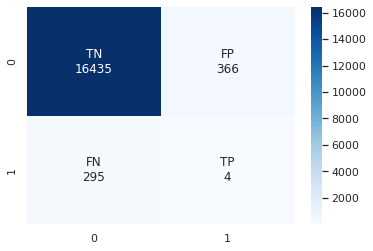

In [143]:
# Defining our model
GB_model = LGBMClassifier(n_estimators = best_params_gb['n_estimators'],
                          max_depth = best_params_gb['max_depth'],
                          learning_rate = best_params_gb['learning_rate'],
                          n_jobs = -1,
                          random_state = 42) 


# Fit and predict, and obtain train and test scores
GB_model.fit(X_train , Y_train)
# Fit and predict, and obtain train and test scores
F3_GB = model_results_pred(GB_model , X_train , X_test , Y_train , Y_test)

## AdaBoost Classifier

### HyperParameter Tuning

In [144]:
params = {'n_estimators':[ 400 , 600 , 650 , 700 , 750 , 800 ]}


# Obtain best hyperparameters
best_params_ab , best_score_ab = tuning(X_train,
                                        Y_train,
                                        AdaBoostClassifier(random_state=42),
                                        params,
                                        cv=4)


print(" Best Parameters:",best_params_ab,"with score of:",best_score_ab)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 2/4; 1/6] START n_estimators=400............................................
[CV 2/4; 1/6] END .............n_estimators=400;, score=0.998 total time= 3.7min
[CV 3/4; 2/6] START n_estimators=600............................................
[CV 3/4; 2/6] END .............n_estimators=600;, score=0.998 total time= 5.6min
[CV 1/4; 3/6] START n_estimators=650............................................
[CV 1/4; 3/6] END .............n_estimators=650;, score=0.979 total time= 6.1min
[CV 1/4; 4/6] START n_estimators=700............................................
[CV 1/4; 4/6] END .............n_estimators=700;, score=0.978 total time= 6.5min
[CV 1/4; 5/6] START n_estimators=750............................................
[CV 1/4; 5/6] END .............n_estimators=750;, score=0.979 total time= 6.9min
[CV 1/4; 6/6] START n_estimators=800............................................
[CV 1/4; 6/6] END .............n_estimators=800;,

### Training and Testing

Macro-F3 Score:  0.486046156578381
	Test Confusion Matrix


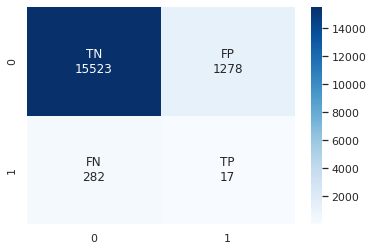

In [145]:
# Defining our model
AB_model = AdaBoostClassifier(random_state=42,
                              n_estimators = best_params_ab['n_estimators']) 


# Fit and predict, and obtain train and test scores
AB_model.fit(X_train , Y_train)
# Fit and predict, and obtain train and test scores
F3_AB = model_results_pred(AB_model , X_train , X_test , Y_train , Y_test)

## Custom Ensemble (Stacking)

**Split the Train Dataset 50-50**

In [150]:
def split_data( x , y ):
    D_1 , D_2 , Y_1 , Y_2 = train_test_split( x , y , stratify=y , test_size = 0.5 )
    
    D_1 = D_1.reset_index(drop=True)
    D_2 = D_2.reset_index(drop=True)
    
    Y_1 = Y_1.reset_index(drop=True)
    Y_2 = Y_2.reset_index(drop=True)
    
    
    return D_1 , D_2 , Y_1 , Y_2

**Sampling with replacement**

In [154]:
def generating_samples( input_data , target_data ):
    """
    This function samples 60% of 
    the given data, with replacements
    """
    selecting_rows = np.random.choice(list(range(input_data.shape[0])),
                                      size=int(0.6 * len(input_data)),
                                      replace=True)
    
    sample_data = input_data.iloc[ selecting_rows  ]
    target_of_sample_data = target_data.iloc[selecting_rows]

    return sample_data , target_of_sample_data

**Create k sample sets**

In [156]:
def sample_list( x , y , n):
    """
    This function creates a list of all
    n samples and their corresponding outputs
    """
    
    list_input_data =[]
    list_output_data =[]

    for i in range(0,n):
        a,b = generating_samples(x,y)
        list_input_data.append(a)
        list_output_data.append(b)
    return list_input_data, list_output_data 

**Obtain trained base models (Decision Tree Classifier) for each sample**

In [158]:
def train_base_models(x,y,n):
    """
    This function trains a base model for
    each of the given sample dataset
    and stores them in a dictionary
    """
    models = {}
    # For each sample dataset
    for i in tqdm(range(n)):
        # Base Model: Decision Tree Classifier
        best_model = DecisionTreeClassifier() 
        # Fit the model on the sample data
        best_model.fit( x[i] , y[i] )
        # Store the trained model
        models['model_'+str(i)] = best_model
    return models

**Pass dataset through each base model and create meta dataset**

In [160]:
def create_metadata( n , pred):
    """
    This function creates a pandas Dataframe
    consisting of the predictions of all the 
    base models as its features
    """
    df=pd.DataFrame()
    # For each base model
    for i in range(n):
        # Create feature prediction_i which consists of predictions of model i
        df['prediction_'+str(i)] = pred[i]
        
    return df

In [165]:
def predict_k_models( base, x , y ):
    """
    In this function, a dataset passes through the 
    trained base models, and creates a new dataset
    using these predictions as features
    """
    predictions = []
    # For each base model
    for model in base.values():
        # Predict Expected label of test data
        y_hat = model.predict(x)   
        # Append the predictions to a list
        predictions.append(y_hat)
    
    # Call function create_metadata to create new dataset
    df = create_metadata( len(base) , predictions)
    
    return df 

**Model Evaluation**

In [166]:
def ensemble_evaluation( base , meta , x , y ):
    """
    This function passes a dataset through each base model,
    merges the results into a dataframe, passes it through
    a meta model, and gives the final F3 Score
    """
    predictions=[]
    # For each base model
    for model in base.values():
        # Predict Expected label and add append results into a list
        y_hat = model.predict(x)
        predictions.append(y_hat)
        
    # Create a new dataset consisting of the predictions
    test_metadata = create_metadata( len(base) , predictions)
    
    # pass the new dataset through a meta model
    final_y_hat = meta.predict(test_metadata)

    return final_y_hat

**Complete model**

In [167]:
def custom_ensemble( x_train , y_train , x_test , n_estimators ):
    """
    This function runs our custom Ensemble Model
    on the given dataset
    """
    
    D_1 , D_2 , Y_1 , Y_2 = split_data( x_train , y_train )
    # Pass the dataset through each of the given functions
        
    # Generate n samples and add it into a list
    list_input_data, list_output_data = sample_list( D_1 , Y_1 , n_estimators )
        
    # Train n base models 
    base_models = train_base_models( list_input_data , list_output_data ,n_estimators )
    
    # Predict on other half of the data (D2) and create new metadataset
    model_predictions  = predict_k_models( base_models , D_2 , Y_2)
        
    # Fit the meta model to the above created dataset
    meta_model  = XGBClassifier(learning_rate=0.1,
                                max_depth= 10,
                                n_estimators=500,
                                eval_metric='logloss'
                                ).fit(model_predictions , Y_2)
        
    # Evaluate and return Macro-F1 score of the custom model
    y_hat = ensemble_evaluation( base_models , meta_model , X_test , Y_test )
    
        
    return y_hat

**HyperParameter Tuning**

In [168]:
# Specify Parameters
params = [ 100 , 150 , 200 , 300 ]

scores={}
# for each "number of base models"
for n in params:
    # Predict Expected label of test data for each parameter
    y_hat = custom_ensemble( X_train, Y_train , X_test , n )
    # Compute F3 score
    # Add to dictionary as (n:fbeta_score)
    scores[str(n)] = fbeta_score( Y_test , y_hat , average='macro', beta=3)
    
best_k = max(scores, key=scores.get) 
print(best_k) 

100%|██████████| 300/300 [09:31<00:00,  1.91s/it]


200


## Final Model

100%|██████████| 200/200 [06:19<00:00,  1.90s/it]


Macro-F3 score is  0.5029621160391942


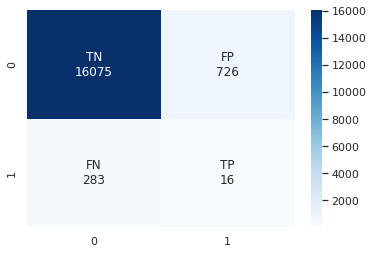

In [169]:
# Specify n_estimators
n_estimators = int(best_k)
# Predict Class labels using our custom ensemble
y_hat = custom_ensemble( X_train, Y_train , X_test , n_estimators )

# Compute Macro-F1 score
F3_custom = fbeta_score( Y_test , y_hat , average='macro', beta = 3)
print("Macro-F3 score is ",F3_custom)

# Plot Confusion Matrix
plot_confusion(Y_test , y_hat)

## Model Scores Summery Table

In [171]:
table=PrettyTable()

table.field_names = ['Model','Macro-F3 Score']
table.add_row(['Baseline',F3_Base])
table.add_row(['Naive Bayes',F3_NB])
#table.add_row(['Random Forest',F3_RF])
table.add_row(['Decision Trees',F3_DT])
table.add_row(['Logistic Regression',F3_LR])
table.add_row(['SGD using HingeLoss',F3_SVM])
table.add_row(['Custom Stacking Ensemble',F3_custom])
table.add_row(['Gradient Boosted Decision Trees',F3_GB])
table.add_row(['Adaptive Boosting',F3_AB])



print(table)

+---------------------------------+---------------------+
|              Model              |    Macro-F3 Score   |
+---------------------------------+---------------------+
|             Baseline            |  0.4991117527880268 |
|           Naive Bayes           |  0.196557624570462  |
|          Decision Trees         |  0.4878322522903948 |
|       Logistic Regression       | 0.10628388913354114 |
|       SGD using HingeLoss       | 0.08563794646429734 |
|     Custom Stacking Ensemble    |  0.5029621160391942 |
| Gradient Boosted Decision Trees |  0.4958483850327113 |
|        Adaptive Boosting        |  0.486046156578381  |
+---------------------------------+---------------------+
